In [2]:
from sklearn import tree
from sklearn.datasets import load_iris
import pandas as pd
import pydotplus
from IPython.display import Image

In [3]:
# Load the Iris dataset
fungi = pd.read_csv(r'C:\Users\mckal\OneDrive\Desktop\Mkk_fun\MKK-Fun\mushrooms.csv')


In [4]:
fungi

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Cleaning up dataset                           c:                       {'o'}

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency 
from sklearn.preprocessing  import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score




In [6]:
# class CONFIG:
#     path = pd.read_csv(r'C:\Users\mckal\OneDrive\Desktop\Mkk_fun\MKK-Fun\mushrooms.csv')
#     seed = 42
#     folds = 5

In [7]:
# dataset = pd.read_csv(CONFIG['path'])


In [8]:
def hide_spines(ax, spines=["top", "right", "left", "bottom"]):
    for spine in spines:
        ax.spines[spine].set_visible(False)

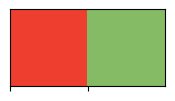

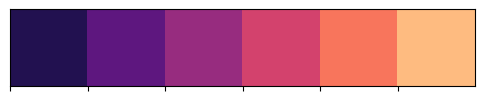

In [9]:
colors = ["#ED3E2F", "#85BB65"]
magma = sns.color_palette("magma")
sns.palplot(colors)
sns.palplot(magma)

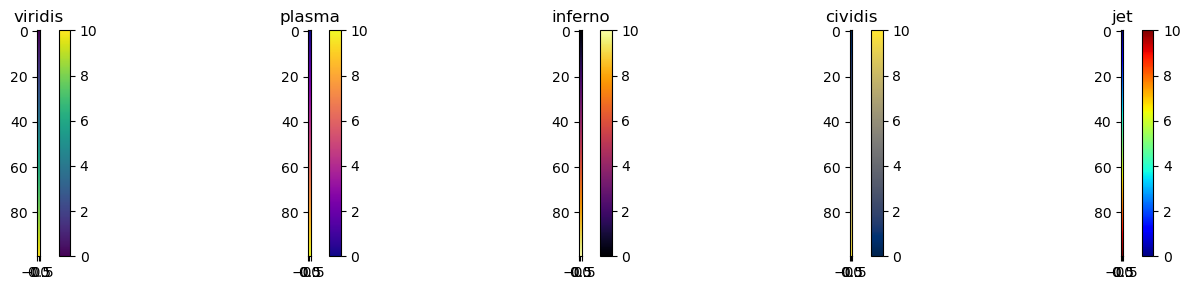

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis for the colorbars
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

# Create a list of colormaps
colormaps = ['viridis', 'plasma', 'inferno', 'cividis', 'jet']

# Create a dummy plot to generate colorbars
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100).reshape(-1, 1)

for i, cmap in enumerate(colormaps):
    # Plot the colorbar
    im = axs[i].imshow(y, cmap=cmap)
    axs[i].set_title(cmap)
    fig.colorbar(im, ax=axs[i], orientation='vertical')

plt.tight_layout()
plt.show()


## Mushroom Data

### Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

# Mushroom Class Analysis

C:\Users\mckal\AppData\Local\Temp\ipykernel_17960\2919190664.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=fungi, palette=colors, ec="#800080", alpha=1, linewidth=1.25, zorder=2, ax=ax)
C:\Users\mckal\AppData\Local\Temp\ipykernel_17960\2919190664.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


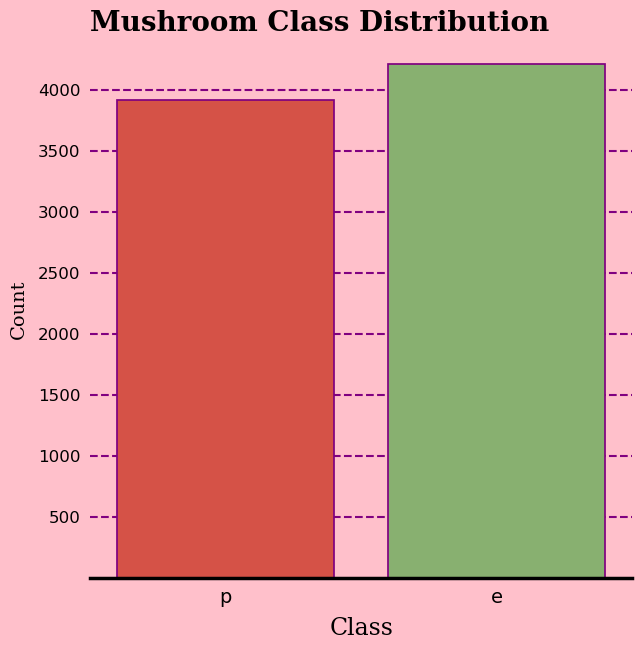

In [11]:
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor("#FFC0CB")

ax = fig.add_subplot()
ax.set_facecolor("#FFC0CB")

sns.countplot(x="class", data=fungi, palette=colors, ec="#800080", alpha=1, linewidth=1.25, zorder=2, ax=ax)
ax.grid(axis="y", linewidth=1.5, color="purple", linestyle="--", zorder=0)
ax.xaxis.set_tick_params(size=0, labelsize=14, pad=7)
ax.set_xlabel("Class", fontsize=17, fontfamily="serif", labelpad=7)
ax.yaxis.set_tick_params(size=0, labelsize=12, pad=7)
ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)
hide_spines(ax, spines=["top", "right", "left"])
ax.spines["bottom"].set(linewidth=2.5)

ax.set_title("Mushroom Class Distribution", fontsize=20, fontweight="bold", fontfamily="serif", loc="left")
ax.set_ylim(1)
fig.show()

C:\Users\mckal\AppData\Local\Temp\ipykernel_17960\540178102.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=fungi, palette=colors, ec=purple, alpha=1, linewidth=1.25, zorder=2, ax=ax)


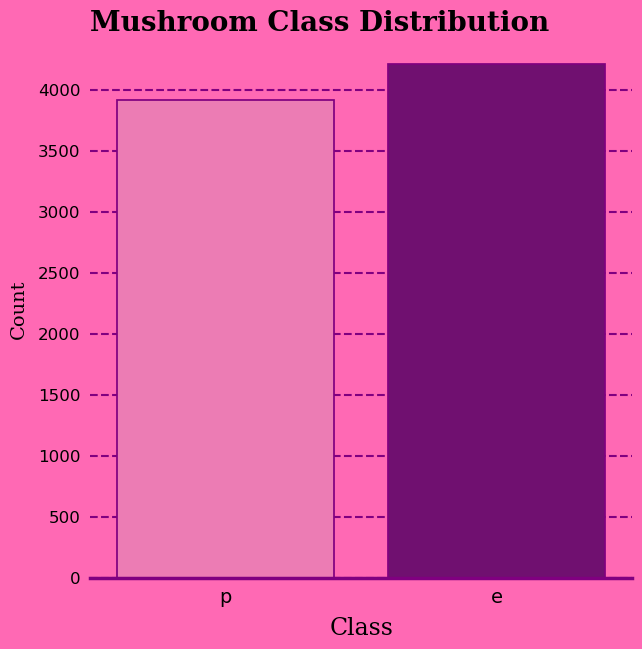

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define pink and purple colors
pink = "#FF69B4"  # Hot pink
purple = "#800080"  # Purple

# Create the figure and set background color to pink
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor(pink)

# Add subplot with pink background
ax = fig.add_subplot()
ax.set_facecolor(pink)

# Define seaborn palette with pink and purple
colors = [pink, purple]

# Plot countplot with pink and purple palette
sns.countplot(x="class", data=fungi, palette=colors, ec=purple, alpha=1, linewidth=1.25, zorder=2, ax=ax)

# Customize grid
ax.grid(axis="y", linewidth=1.5, color=purple, linestyle="--", zorder=0)

# Customize tick parameters
ax.xaxis.set_tick_params(size=0, labelsize=14, pad=7)
ax.set_xlabel("Class", fontsize=17, fontfamily="serif", labelpad=7)
ax.yaxis.set_tick_params(size=0, labelsize=12, pad=7)
ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)

# Hide spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize bottom spine
ax.spines["bottom"].set(linewidth=2.5, color=purple)

# Set title
ax.set_title("Mushroom Class Distribution", fontsize=20, fontweight="bold", fontfamily="serif", loc="left")

# Ensure y-axis starts from 0
ax.set_ylim(0)

# Show the plot
plt.show()


## Mushroom Features Analysis 

In [13]:
features = fungi.columns[1:].tolist()
print(features, len(features))

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 22


C:\Users\mckal\AppData\Local\Temp\ipykernel_17960\2481182333.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, palette=spring_palette, data=fungi, ec="black", alpha=1, linewidth=1.5, zorder=2, ax=ax)
C:\Users\mckal\AppData\Local\Temp\ipykernel_17960\2481182333.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, palette=spring_palette, data=fungi, ec="black", alpha=1, linewidth=1.5, zorder=2, ax=ax)
C:\Users\mckal\AppData\Local\Temp\ipykernel_17960\2481182333.py:18: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(x=feature, palette=spring_palette, data=fungi, ec="black", alpha=1, linewidth=1.5, zorde

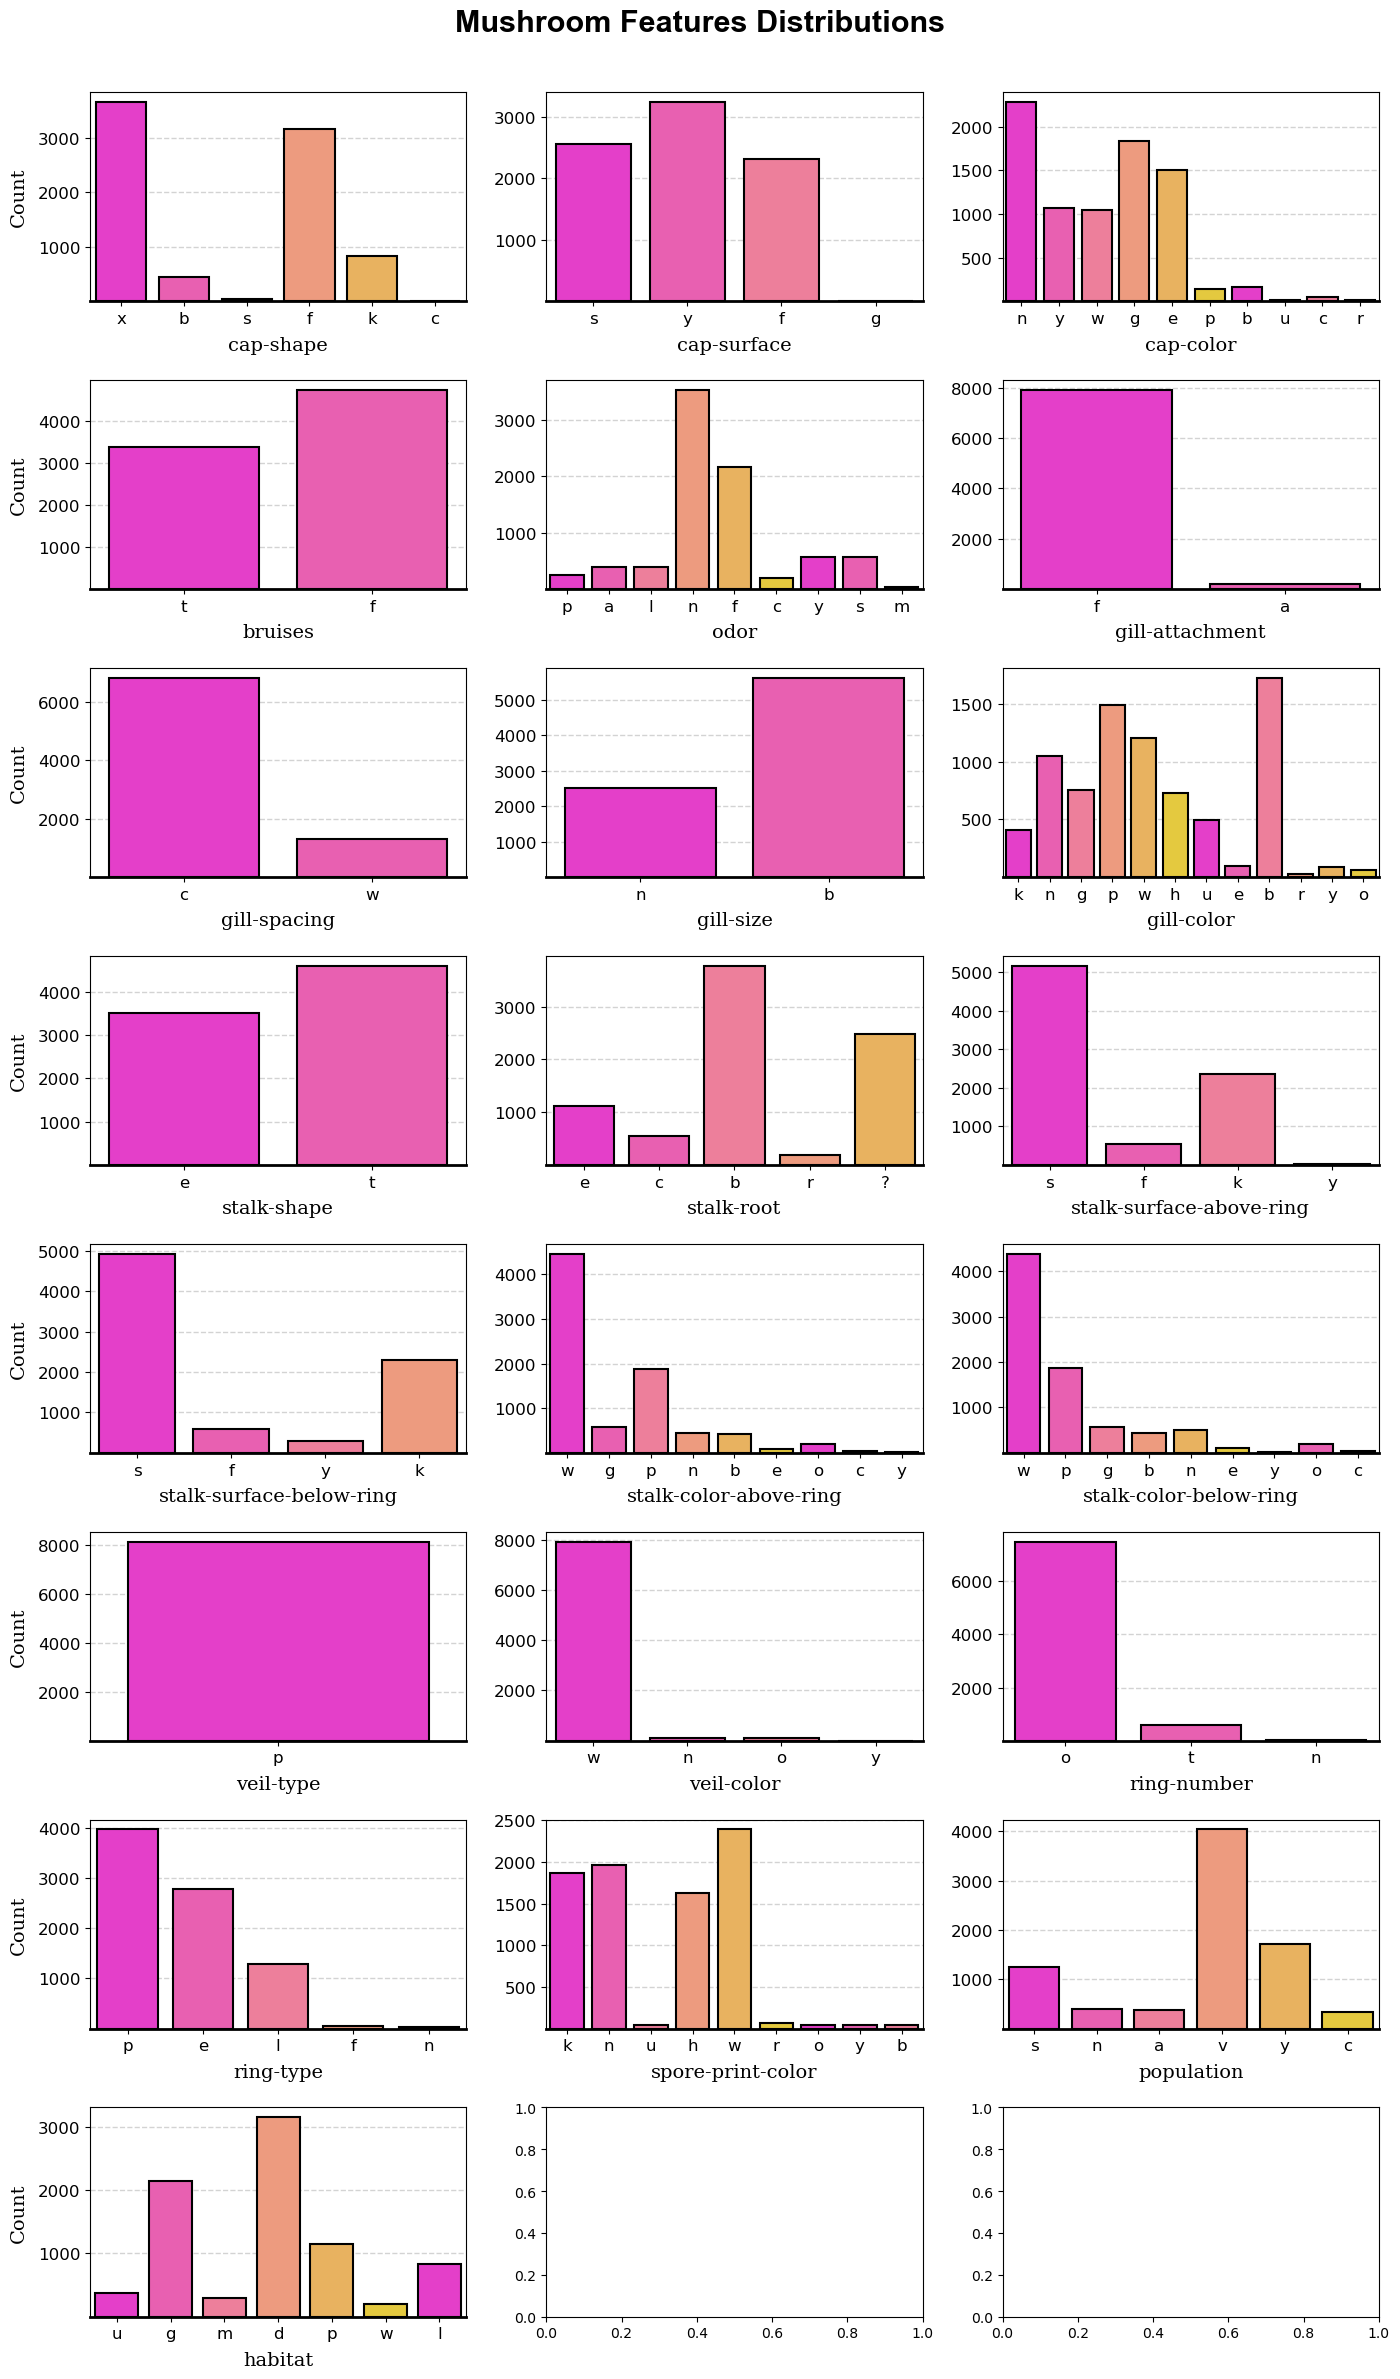

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define springtime colors
spring_palette = sns.color_palette("spring")

# Assuming 'features' is a list of feature names
rows = 8
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 25))
fig.set_facecolor("#fff")

for idx, feature in enumerate(features):
    ax = axes[idx // cols, idx % cols]  # Calculate subplot index
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    sns.countplot(x=feature, palette=spring_palette, data=fungi, ec="black", alpha=1, linewidth=1.5, zorder=2, ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    ax.set_ylabel("Count" if idx % cols == 0 else "", fontsize=14, fontfamily="serif", labelpad=7)
    ax.spines["bottom"].set(linewidth=2)
    ax.set_ylim(1)
    ax.set_title("")  # Remove title
    
# Set main title
fig.suptitle("Mushroom Features Distributions", fontsize=22, fontweight="bold", fontfamily="Arial")

# Adjust layout
fig.tight_layout(rect=[0.03, 0.03, 0.97, 0.97], w_pad=2, h_pad=1.5)

# Show the plot
plt.show()


## Mushroom Classification Features Relationships

C:\Users\mckal\AppData\Local\Temp\ipykernel_17960\99211522.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


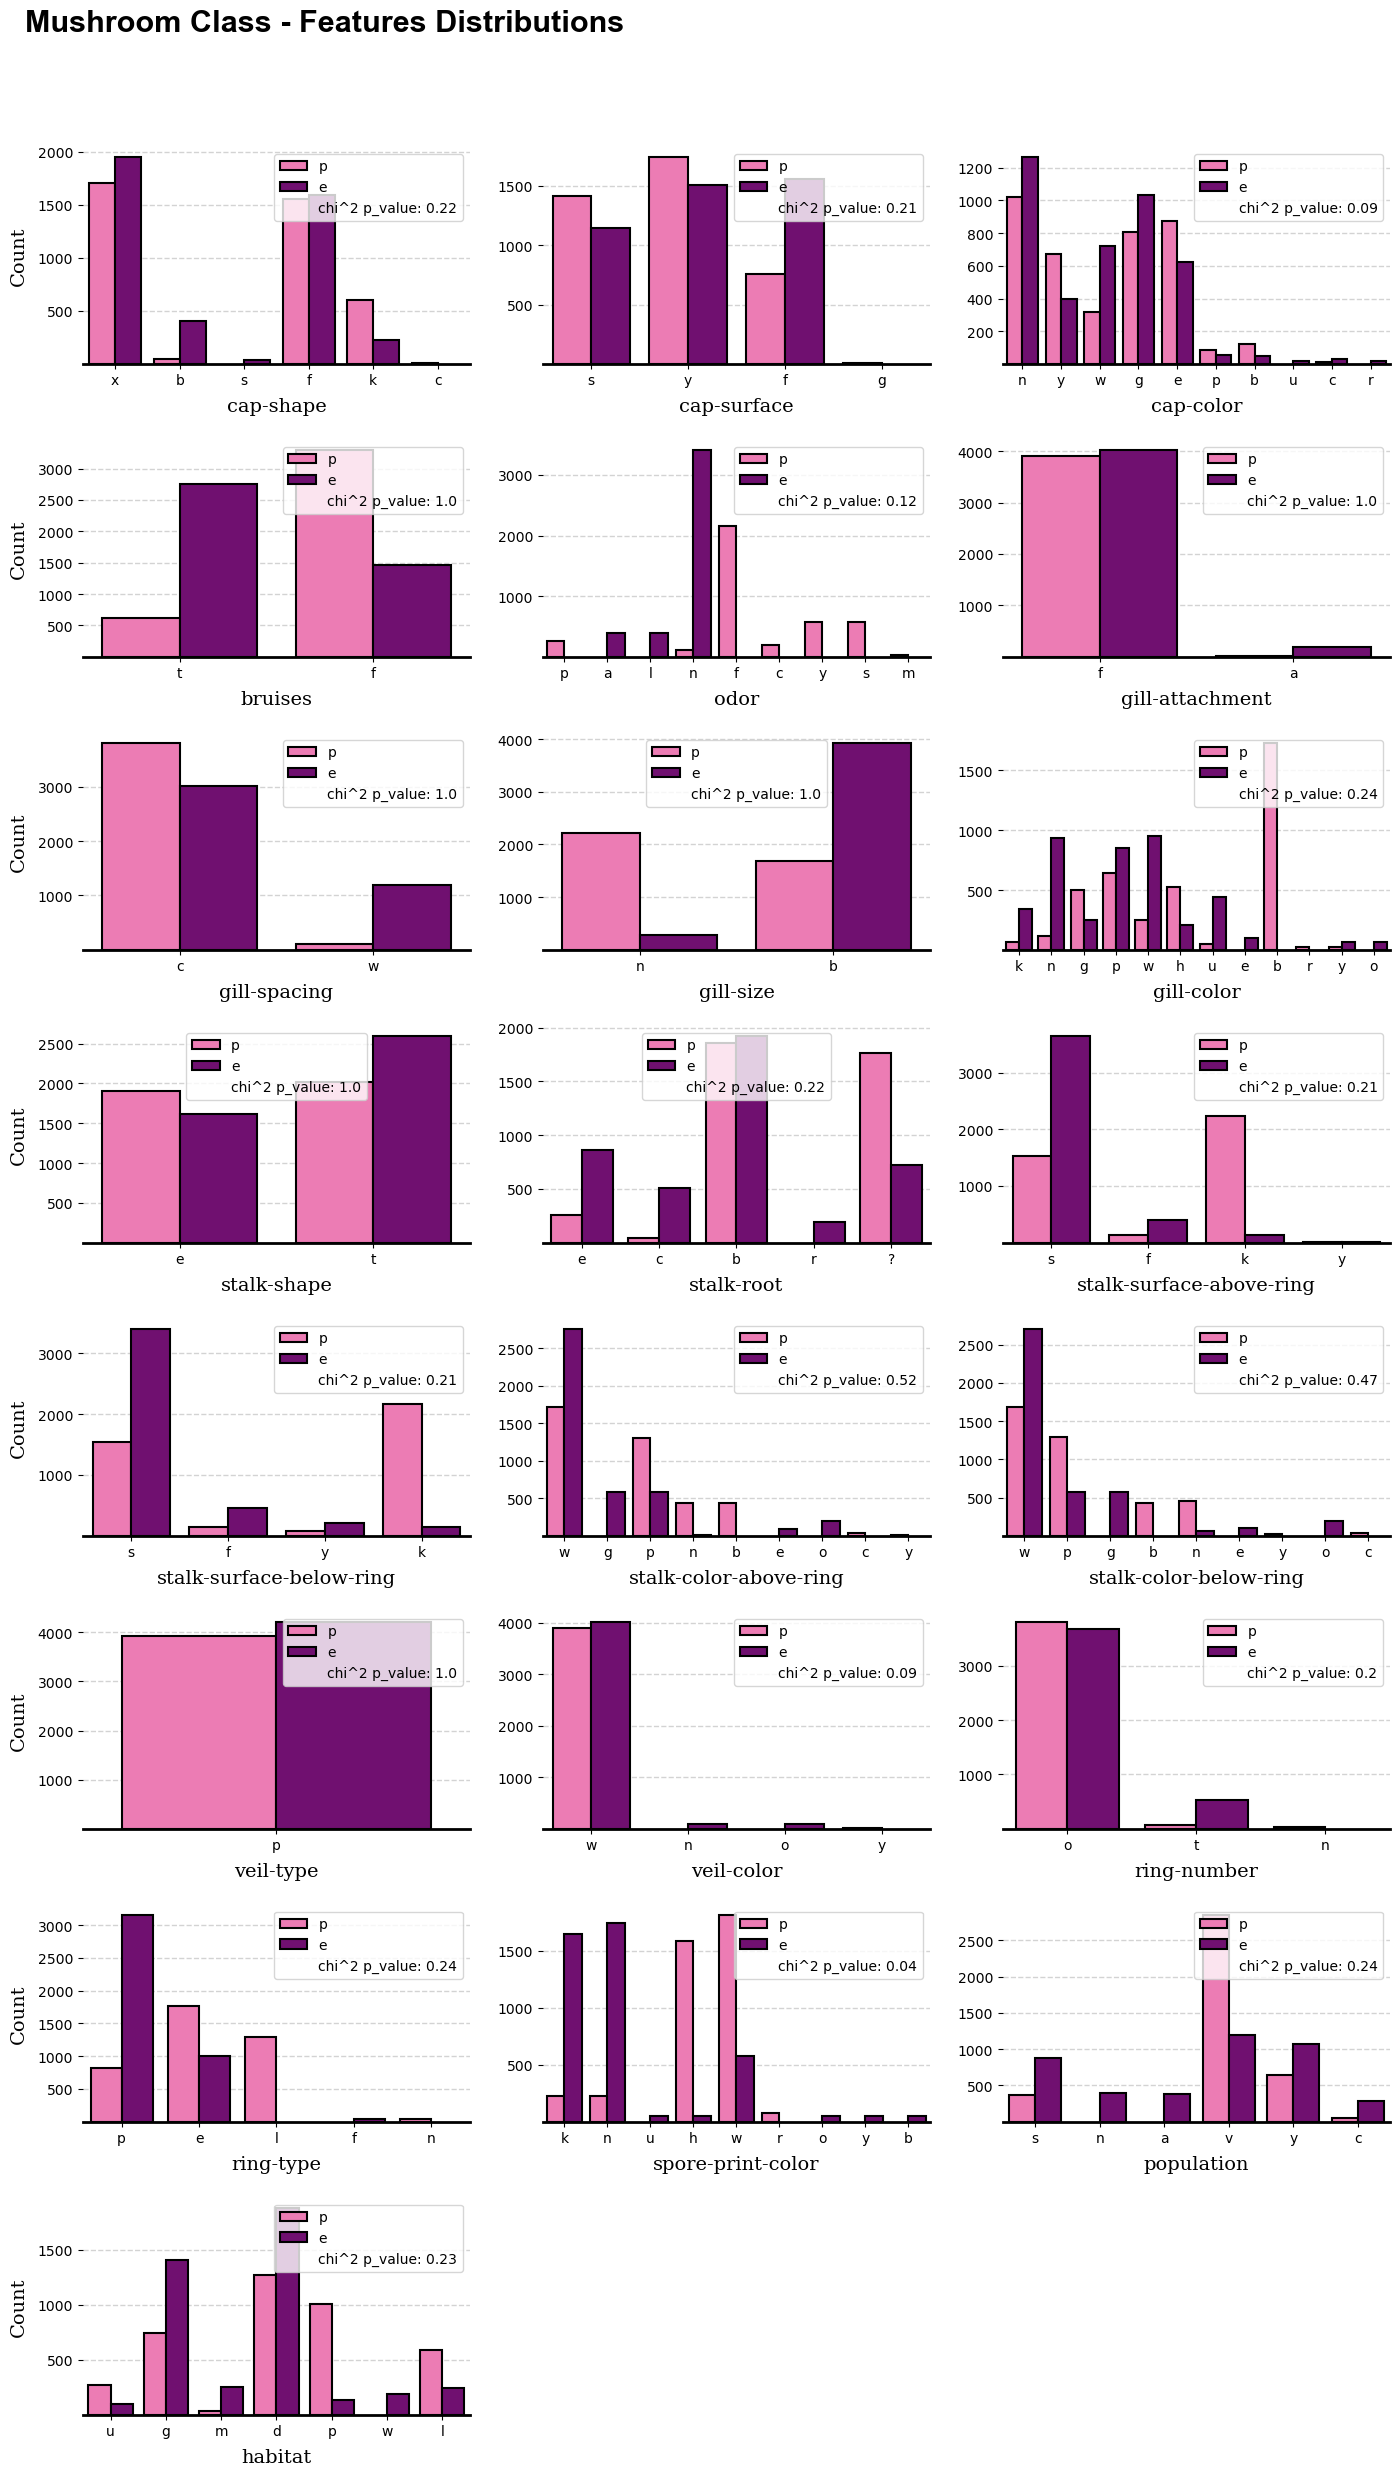

In [18]:
rows = 8
cols = 3
magma_palette = sns.color_palette("spring")
fig = plt.figure(figsize=(15, 25))
fig.set_facecolor("#fff")
for idx, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.set_facecolor("#fff")
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    sns.countplot(x=feature, palette=colors, hue="class", data=fungi, ec="#000", alpha=1, linewidth=1.5, zorder=2)
    
    feature_data_p = fungi[fungi["class"] == "p"][feature].value_counts()
    feature_data_e = fungi[fungi["class"] == "e"][feature].value_counts()
    
    for idx_p in feature_data_p.index:
        if idx_p not in feature_data_e.index:
            feature_data_e[idx_p] = 0
    
    for idx_e in feature_data_e.index:
        if idx_e not in feature_data_p.index:
            feature_data_p[idx_e] = 0
    
    
    feature_data_p = feature_data_p.sort_index()
    feature_data_e = feature_data_e.sort_index()
    crosstable = pd.crosstab(feature_data_p.values, feature_data_e.values)
    stat, p_value, dof , _ = chi2_contingency(crosstable)
    
    if idx % cols == 0:
        ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)
    else:
        ax.set_ylabel("")
        
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    hide_spines(ax, spines=["top", "right", "left"])
    ax.spines["bottom"].set(linewidth=2)
    ax.axvline(x=0, label=f"chi^2 p_value: {np.round(p_value, 2)}", visible=False, color="#000")
    ax.set_ylim(1)
    ax.legend()

fig.text(x=0.05, y=1.01, s="Mushroom Class - Features Distributions", fontsize=22, fontweight="bold", fontfamily="Arial")
fig.tight_layout(rect=[0.03, 0.03, 0.97, 0.97], w_pad=2, h_pad=1.5)
fig.show()


## Decision Tree Classifier 

In [16]:
# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(fungi.data, fungi.target)
clf.score(fungi.data, fungi.target)

AttributeError: 'DataFrame' object has no attribute 'data'

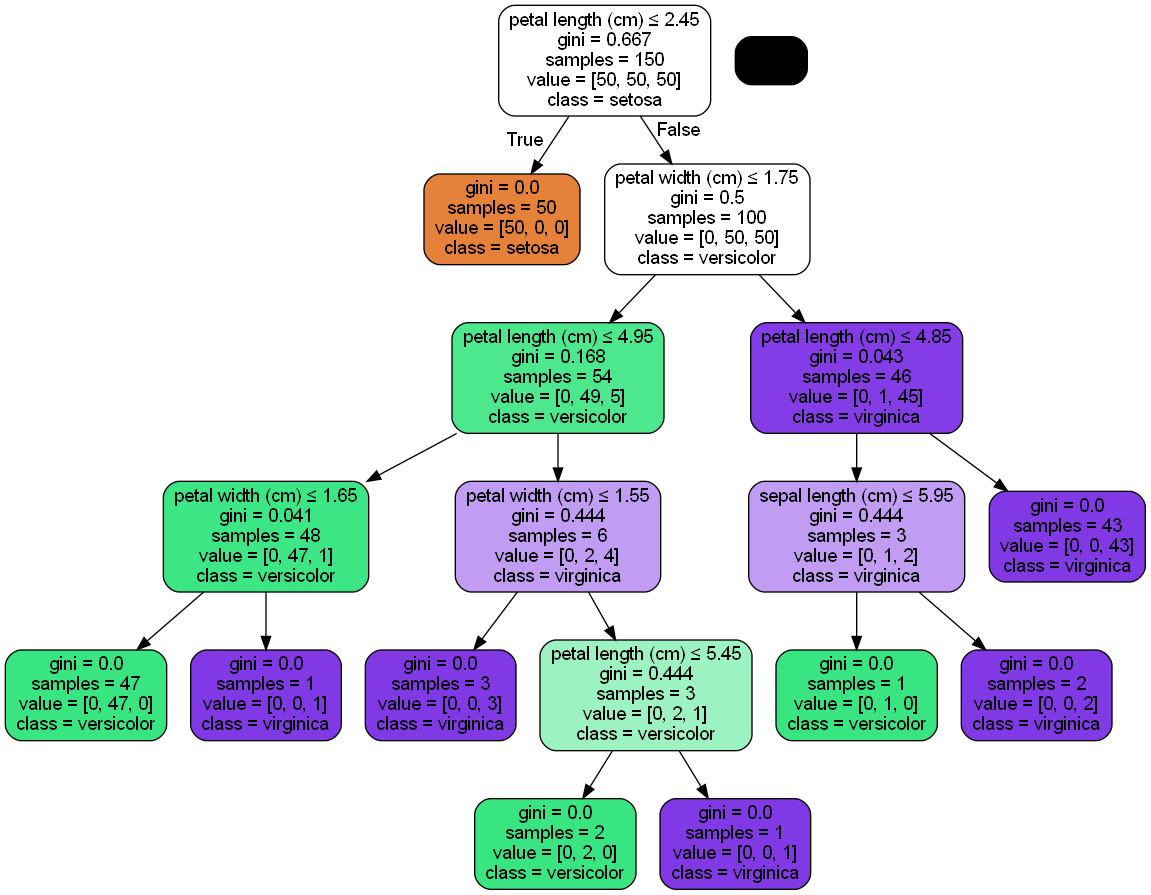

In [ ]:
# Create a decision tree graph
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris.png')

# Show graph
Image(graph.create_png())